# Prac 03. Part 2


In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
plt.rcParams['figure.figsize'] = [15, 10]

Відкриття зображення

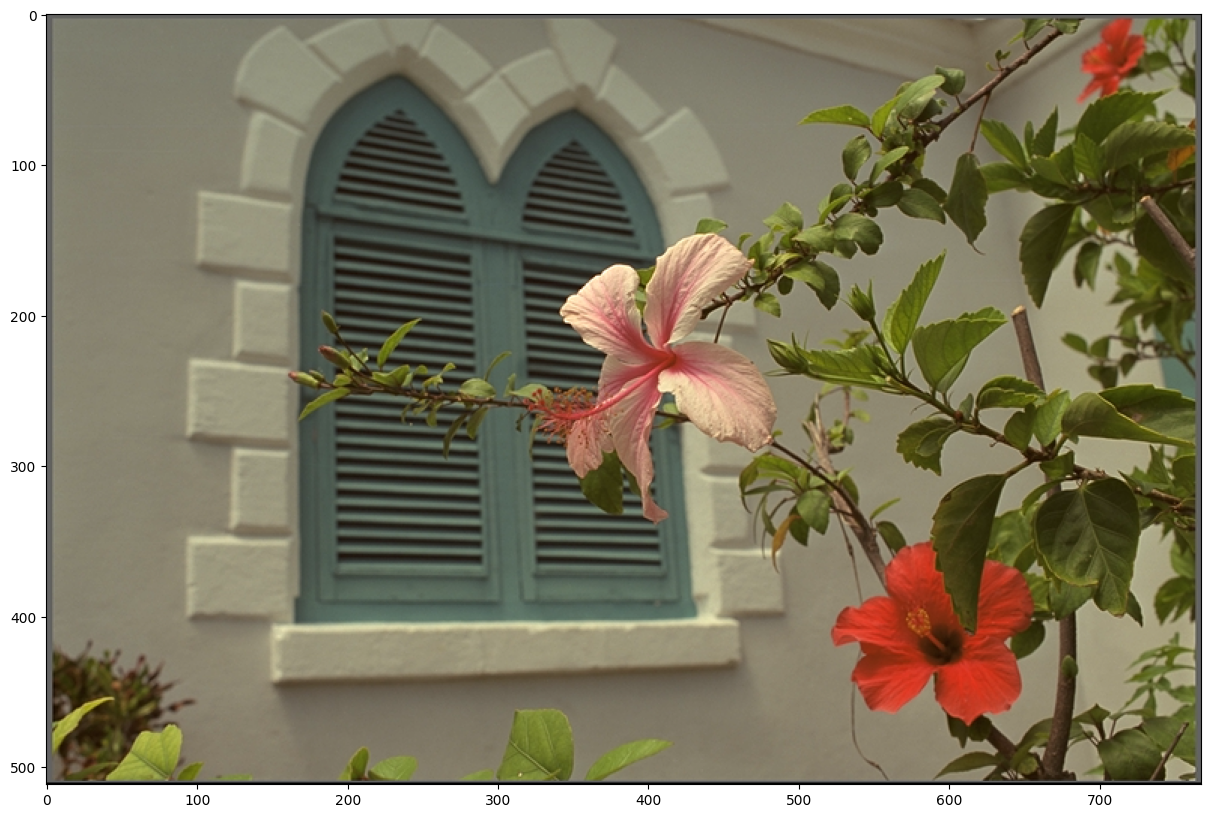

In [30]:
img = cv2.imread('kodim07.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Інвертування кольорової інтенсивності (saturation):

(<Axes: >, <matplotlib.image.AxesImage at 0x24bb49dbec0>)

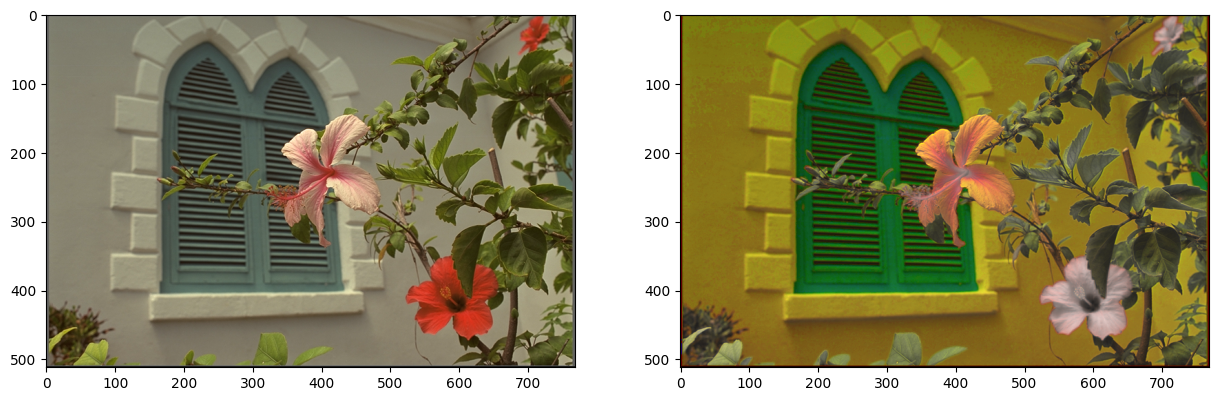

In [31]:
inverted = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
inverted[:,:,1] = 255 - inverted[:,:,1] # saturation channel
inverted = cv2.cvtColor(inverted, cv2.COLOR_HSV2RGB)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(inverted)

Для деякої з компонент змінити на постійне значення.

(Обрано додавання 50 до червоного)

(<Axes: >, <matplotlib.image.AxesImage at 0x24bb5482300>)

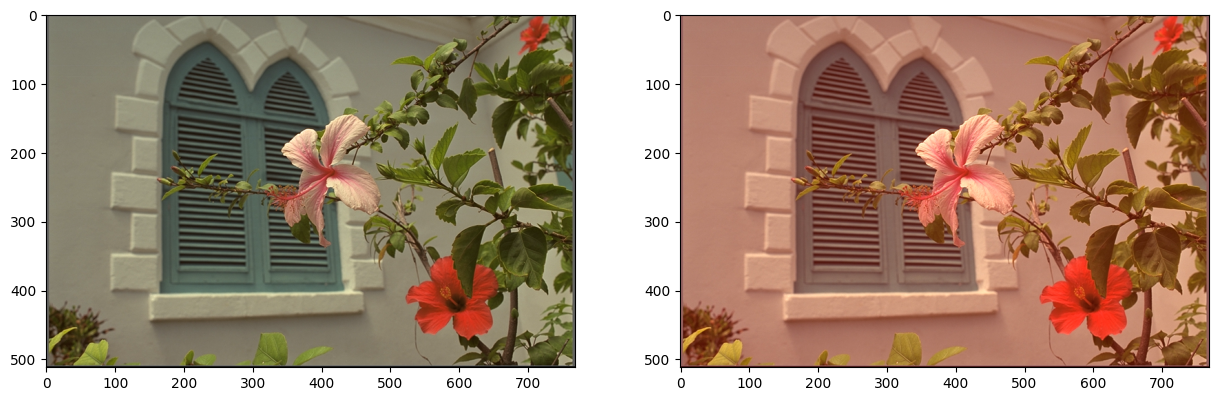

In [33]:
added = deepcopy(img)
added = added.astype(np.float32)
added[:,:,0] += 50
added = np.clip(added, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(added)

Розбивка на компоненти Red, Green, Blue.

(<Axes: >, <matplotlib.image.AxesImage at 0x24bb6a0f8c0>)

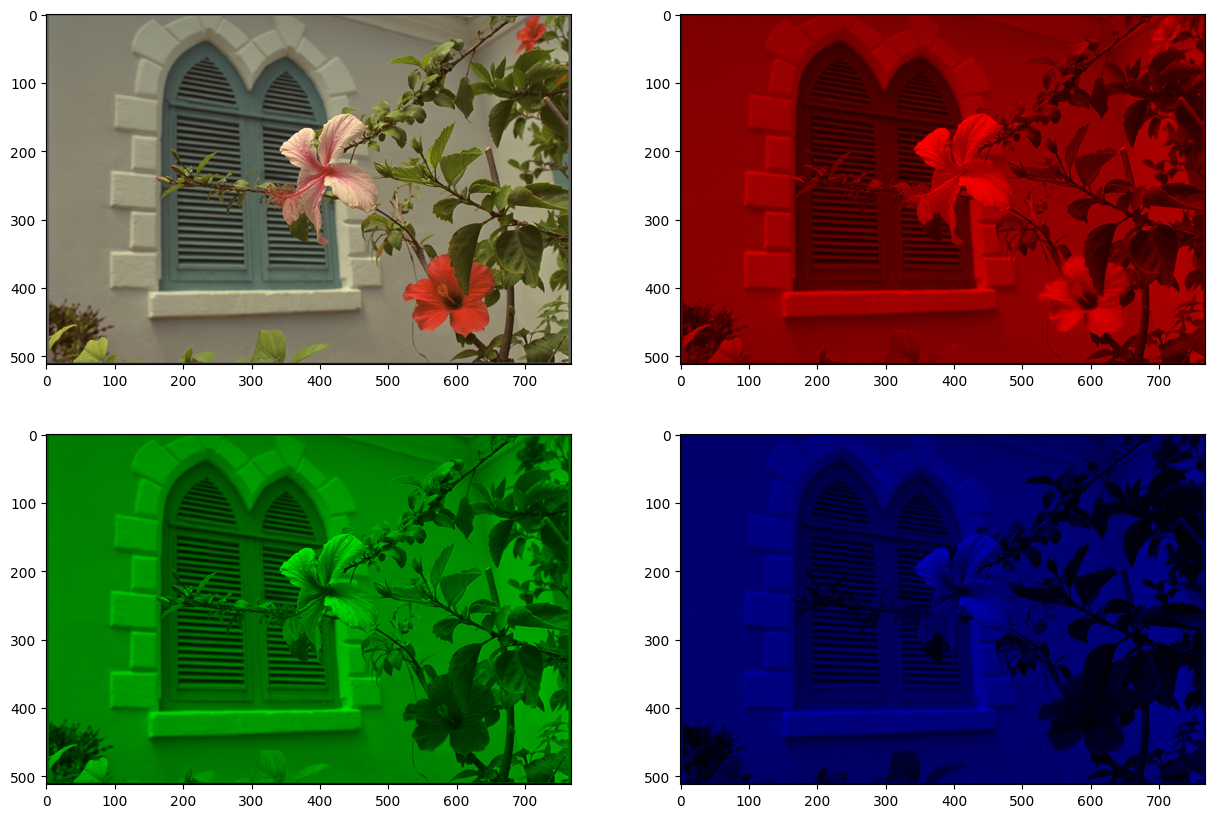

In [36]:
red, green, blue = cv2.split(img)

red_image = np.zeros_like(img)
red_image[:,:,0] = red

green_image = np.zeros_like(img)
green_image[:,:,1] = green

blue_image = np.zeros_like(img)
blue_image[:,:,2] = blue

plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(red_image)
plt.subplot(223), plt.imshow(green_image)
plt.subplot(224), plt.imshow(blue_image)

Злиття двох зображеннь з коефіцієнтом

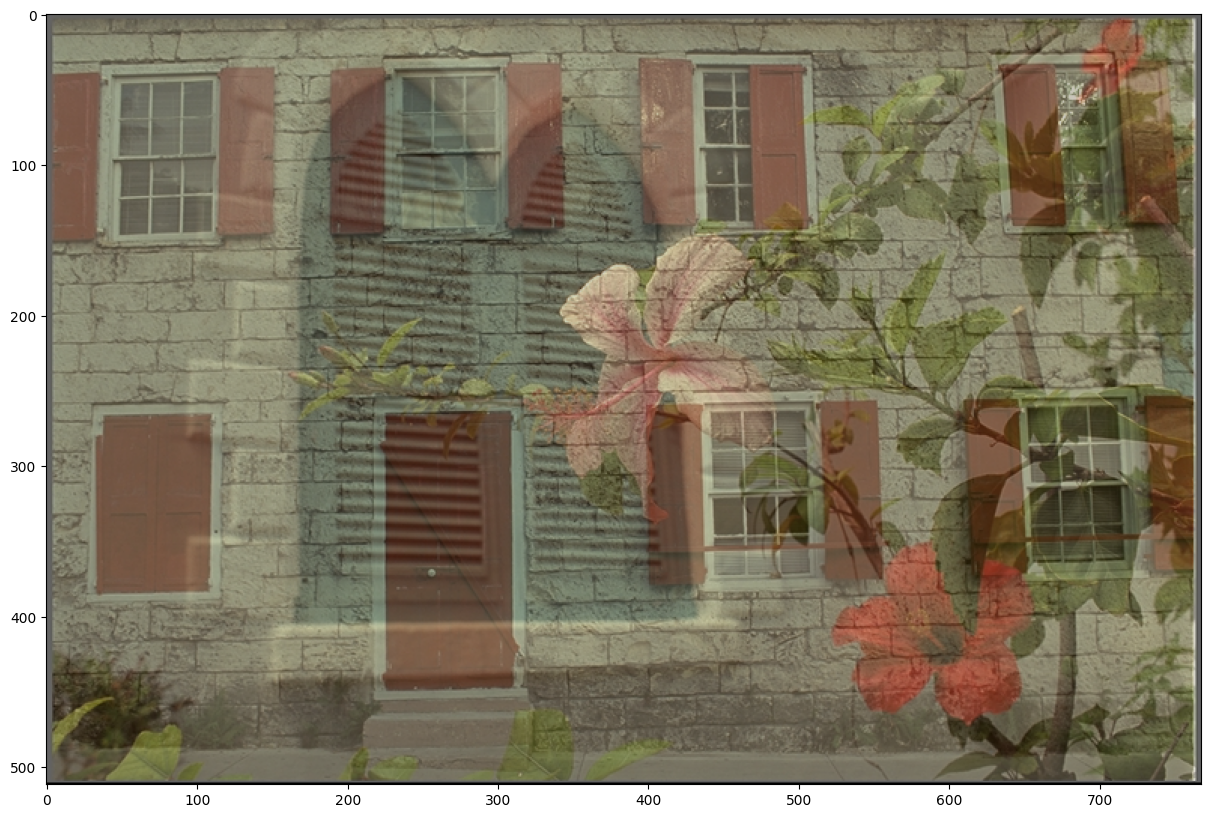

In [39]:
alpha = 0.5

img_1 = cv2.imread('kodim07.png')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_2 = cv2.imread('kodim01.png')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

img_3 = img_1.astype(np.float32)*alpha + img_2.astype(np.float32)*(1-alpha)

img_3 = np.clip(img_3, 0, 255).astype(np.uint8)

plt.imshow(img_3)

Фільтрація зображення згорткою

(<Axes: >, <matplotlib.image.AxesImage at 0x24bd42d74a0>)

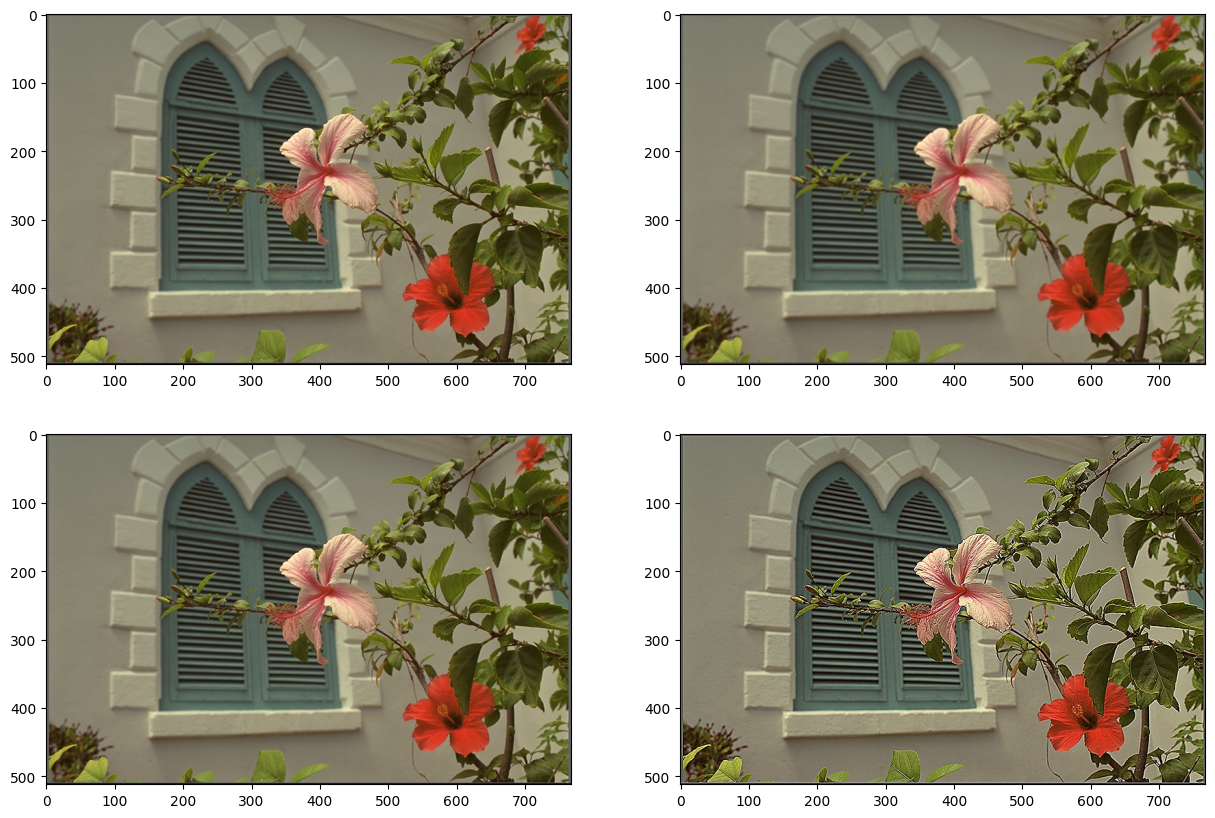

In [46]:
gauss_kernel = np.array([[0.0625, 0.125, 0.0625],
        [0.125,  0.25,  0.125],
        [0.0625, 0.125, 0.0625]])
sharpen_kernel = np.array([[0, -1, 0],
        [-1,  5,  -1],
        [0, -1, 0]])

blured_img = cv2.filter2D(src = img, ddepth = -1, kernel = gauss_kernel)
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(blured_img)

sharpened_img = deepcopy(img).astype(np.float32)
sharpened_img = cv2.filter2D(src = img, ddepth = -1, kernel = sharpen_kernel)
sharpened_img = np.clip(sharpened_img, 0, 255).astype(np.uint8)
plt.subplot(223), plt.imshow(img)
plt.subplot(224), plt.imshow(sharpened_img)


Медіанний фільтр

(<Axes: >, <matplotlib.image.AxesImage at 0x24bd41e7f50>)

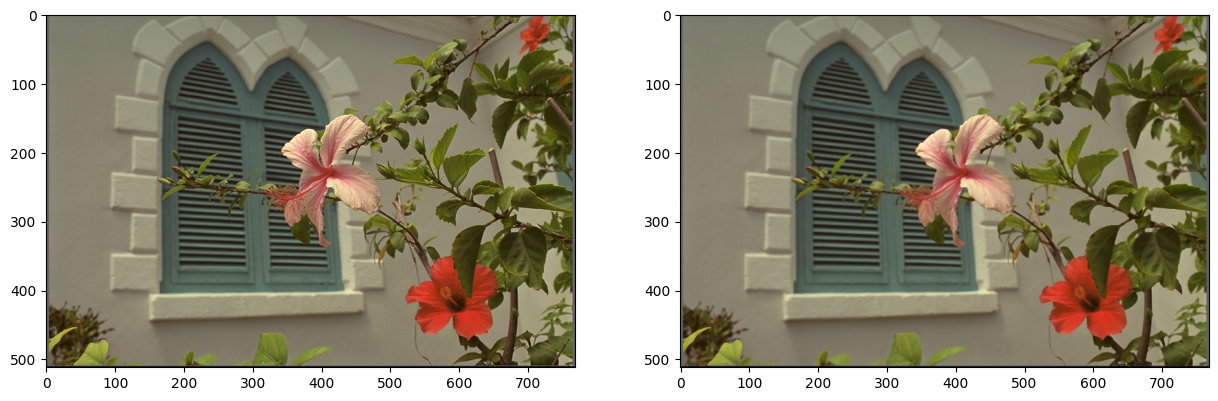

In [50]:
medianed = deepcopy(img)

for i in range(1, medianed.shape[0]-1):
    for j in range(1, medianed.shape[1]-1):
        neighbors = np.array([
            [img[i-1][j-1],img[i][j-1],img[i+1][j-1]],
            [img[i-1][j],img[i][j],img[i+1][j]],
            [img[i-1][j+1],img[i][j+1],img[i+1][j+1]],
        ])
        median_r = np.median(neighbors[:,:,0])
        median_g = np.median(neighbors[:,:,1])
        median_b = np.median(neighbors[:,:,2])
        medianed[i][j] = [median_r, median_g, median_b]

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(medianed)
        